In [ ]:
# =============================================
# Overfitting vs Underfitting Demonstration
# =============================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


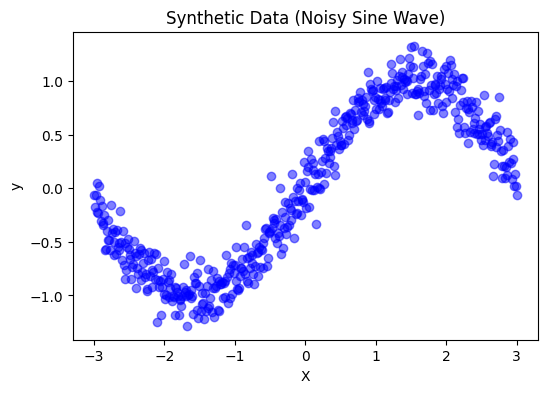

In [ ]:
# -----------------------------
# 1. Create Synthetic Data
# -----------------------------
np.random.seed(42) #This ensures that the exact same random numbers are generated every time you run the code. It makes the results reproducible; if you run it tomorrow, the "noise" added will be the same.
X = np.linspace(-3, 3, 500) #generates an array of 500 evenly spaced numbers
y = np.sin(X) + np.random.normal(0, 0.15, X.shape)
#This line has two parts: 1. np.sin(X): Calculates the ideal sine wave based on the $X$ values.
#np.random.normal(0, 0.15, X.shape): Generates random noise. It creates 500 random numbers drawn from a normal distribution (mean $\mu=0$ and standard deviation $\sigma=0.15$). This noise is added to the ideal sine wave to simulate real-world errors or variance.
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color="blue", alpha=0.5)
plt.title("Synthetic Data (Noisy Sine Wave)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Keras expects 2D input (samples, features)
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

In [ ]:
# -----------------------------
# 2. Define Models
# -----------------------------
# Underfitting model: too simple
underfit_model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Good-fit model: moderate complexity
good_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(1,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])

In [ ]:
# Overfitting model: too complex
overfit_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
models = {
    "Underfitting": underfit_model,
    "Good Fit": good_model,
    "Overfitting": overfit_model
}

In [ ]:
# -----------------------------
# 3. Compile and Train
# -----------------------------
histories = {}
for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')
    print(f"\nTraining {name} model...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        verbose=0
    )
    histories[name] = history


Training Underfitting model...

Training Good Fit model...

Training Overfitting model...


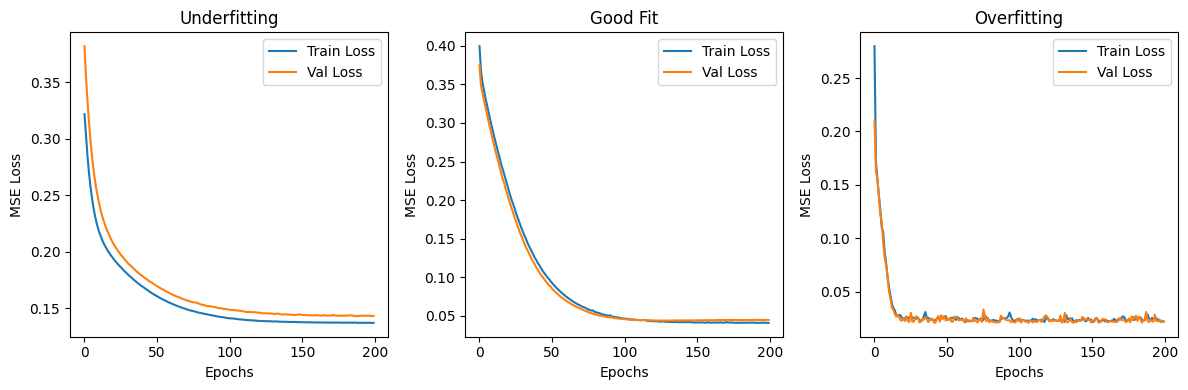

In [ ]:
# -----------------------------
# 4. Plot Learning Curves
# -----------------------------
plt.figure(figsize=(12, 4))
for i, (name, history) in enumerate(histories.items()):
    plt.subplot(1, 3, i + 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


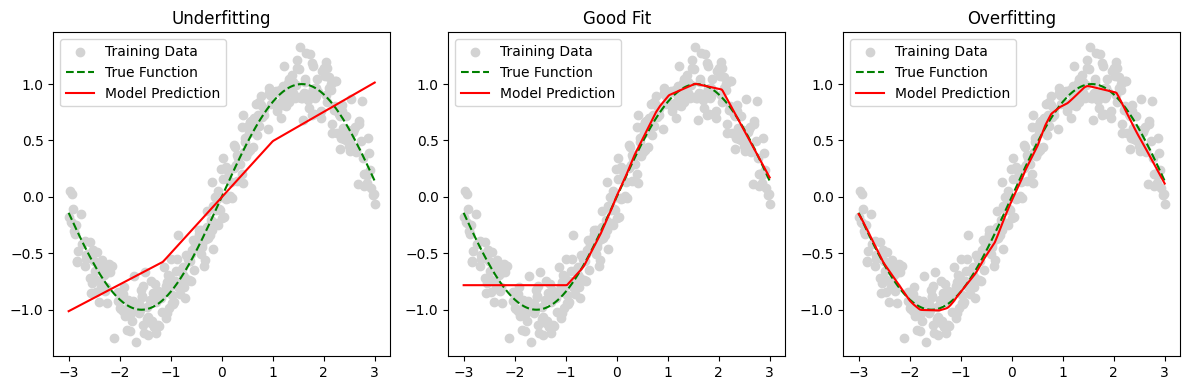

In [ ]:
# -----------------------------
# 5. Visualize Model Predictions
# -----------------------------
plt.figure(figsize=(12, 4))
x_line = np.linspace(-3, 3, 300).reshape(-1, 1)

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='lightgray', label='Training Data')
    plt.plot(x_line, np.sin(x_line), 'g--', label='True Function')
    plt.plot(x_line, model.predict(x_line), 'r', label='Model Prediction')
    plt.title(name)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# ===================================================
# Dropout Regularization Demonstration (For Students)
# ===================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

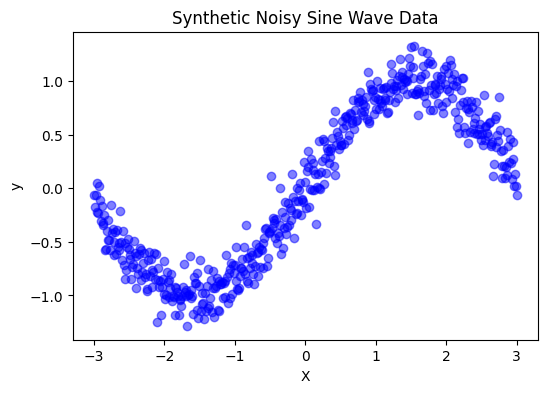

In [ ]:
# -----------------------------
# 1. Generate Synthetic Data
# -----------------------------
np.random.seed(42)
X = np.linspace(-3, 3, 500)
y = np.sin(X) + np.random.normal(0, 0.15, X.shape)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color="blue", alpha=0.5)
plt.title("Synthetic Noisy Sine Wave Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1) #If X_train was a list of 350 numbers, its new shape becomes (350, 1).
X_val = X_val.reshape(-1, 1) #If X_val was a list of 150 numbers, its new shape becomes (150, 1).


In [ ]:
# -----------------------------
# 2. Define Two Models
# -----------------------------
# Model 1: Without Dropout (likely to overfit)
model_no_dropout = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
# Model 2: With Dropout
model_with_dropout = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dropout(0.3),  # randomly drops 30% of neurons
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
# -----------------------------
# 3. Compile Both Models
# -----------------------------
model_no_dropout.compile(optimizer='adam', loss='mse')
model_with_dropout.compile(optimizer='adam', loss='mse')

In [ ]:
# -----------------------------
# 4. Train Both Models
# -----------------------------
history_no_dropout = model_no_dropout.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    verbose=0 #controls the amount of information printed to the console during the training process.
)

In [ ]:
history_with_dropout = model_with_dropout.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    verbose=0
)


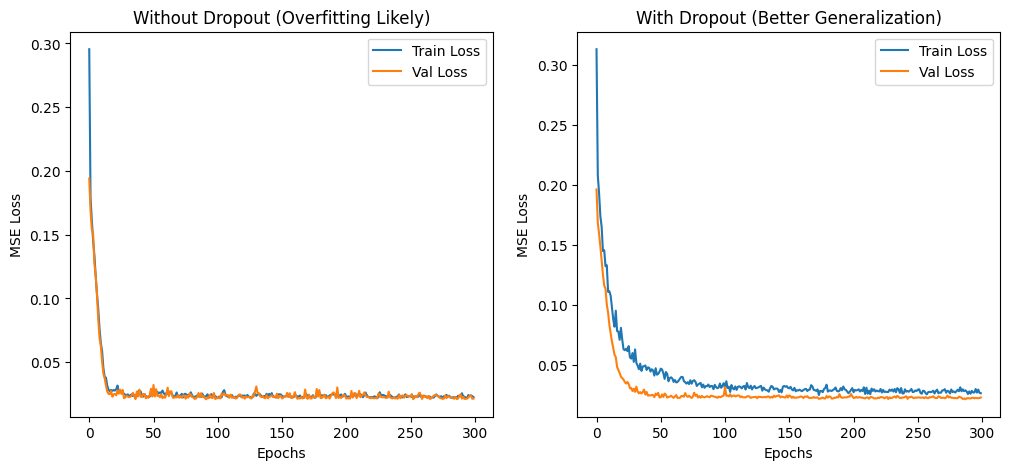

In [ ]:
# -----------------------------
# 5. Plot Learning Curves
# -----------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['loss'], label='Train Loss')
plt.plot(history_no_dropout.history['val_loss'], label='Val Loss')
plt.title("Without Dropout (Overfitting Likely)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Train Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Val Loss')
plt.title("With Dropout (Better Generalization)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


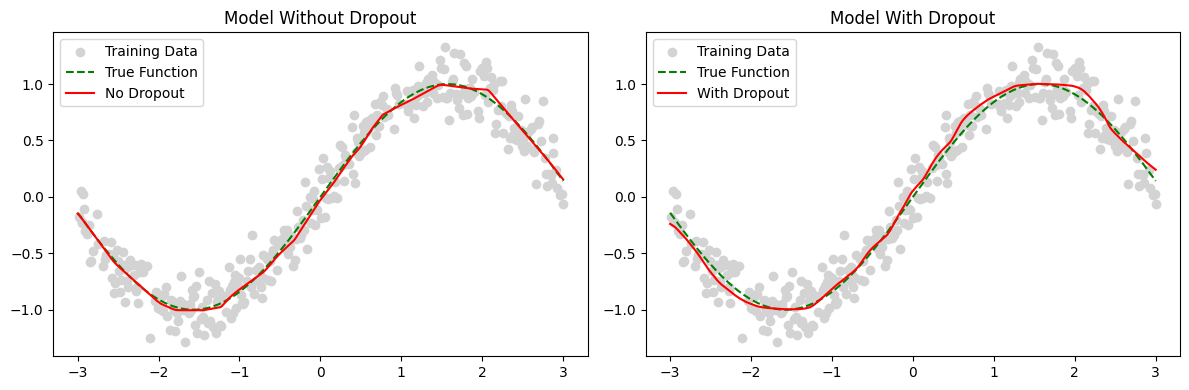

In [ ]:
# -----------------------------
# 6. Visualize Predictions
# -----------------------------
x_line = np.linspace(-3, 3, 300).reshape(-1, 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='lightgray', label='Training Data')
plt.plot(x_line, np.sin(x_line), 'g--', label='True Function')
plt.plot(x_line, model_no_dropout.predict(x_line), 'r', label='No Dropout')
plt.title("Model Without Dropout")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='lightgray', label='Training Data')
plt.plot(x_line, np.sin(x_line), 'g--', label='True Function')
plt.plot(x_line, model_with_dropout.predict(x_line), 'r', label='With Dropout')
plt.title("Model With Dropout")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# ===================================================
# L1 and L2 Regularization Demonstration (For Students)
# ===================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split


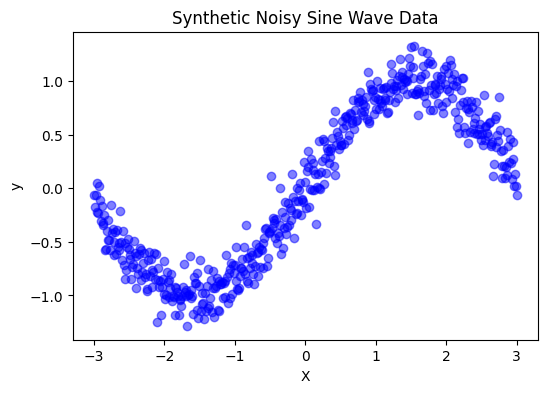

In [ ]:
# -----------------------------
# 1. Generate Synthetic Data
# -----------------------------
np.random.seed(42)
X = np.linspace(-3, 3, 500)
y = np.sin(X) + np.random.normal(0, 0.15, X.shape)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color="blue", alpha=0.5)
plt.title("Synthetic Noisy Sine Wave Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Prepare data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

In [ ]:
# -----------------------------
# 2. Define Three Models
# -----------------------------
# (A) No Regularization
model_no_reg = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
# (B) L1 Regularization (Lasso)
model_l1 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,),
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(1)
])

In [ ]:
# (C) L2 Regularization (Ridge)
model_l2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

In [ ]:
models = {
    "No Regularization": model_no_reg,
    "L1 Regularization": model_l1,
    "L2 Regularization": model_l2
}

In [ ]:
# -----------------------------
# 3. Compile and Train
# -----------------------------
histories = {}
for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')
    print(f"\nTraining {name} model...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=300,
        verbose=0
    )
    histories[name] = history


Training No Regularization model...

Training L1 Regularization model...

Training L2 Regularization model...


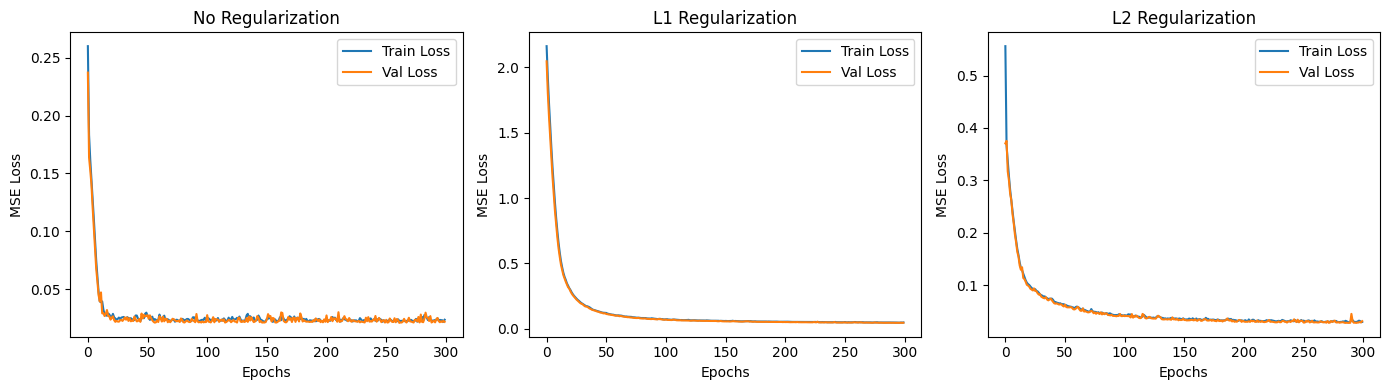

In [ ]:
# -----------------------------
# 4. Plot Learning Curves
# -----------------------------
plt.figure(figsize=(14, 4))
for i, (name, history) in enumerate(histories.items()):
    plt.subplot(1, 3, i + 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


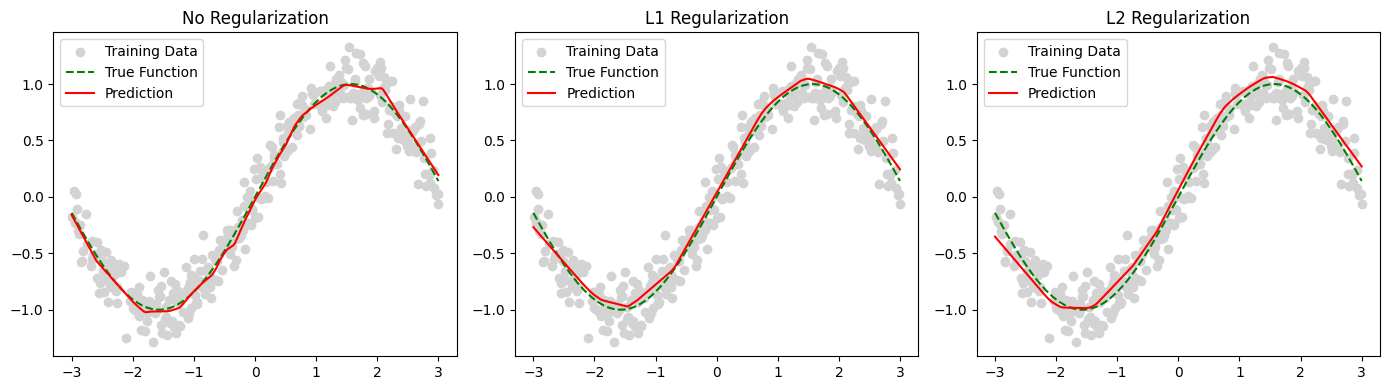

In [ ]:
# -----------------------------
# 5. Visualize Predictions
# -----------------------------
x_line = np.linspace(-3, 3, 300).reshape(-1, 1)

plt.figure(figsize=(14, 4))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='lightgray', label='Training Data')
    plt.plot(x_line, np.sin(x_line), 'g--', label='True Function')
    plt.plot(x_line, model.predict(x_line), 'r', label='Prediction')
    plt.title(name)
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ===================================================
# Batch Normalization Demonstration (For Students)
# ===================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

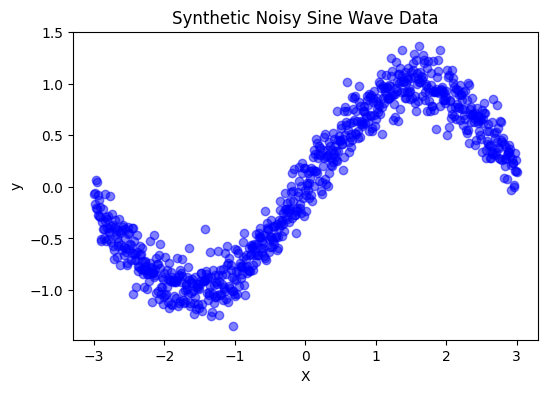

In [ ]:
# -----------------------------
# 1. Generate Synthetic Data
# -----------------------------
np.random.seed(42)
X = np.linspace(-3, 3, 800)
y = np.sin(X) + np.random.normal(0, 0.15, X.shape)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color="blue", alpha=0.5)
plt.title("Synthetic Noisy Sine Wave Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Prepare data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

In [ ]:
# -----------------------------
# 2. Define Two Models
# -----------------------------

# (A) Without Batch Normalization
model_no_bn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
# (B) With Batch Normalization
model_with_bn = keras.Sequential([
    layers.Dense(128, input_shape=(1,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1)
])

In [ ]:
models = {
    "Without Batch Normalization": model_no_bn,
    "With Batch Normalization": model_with_bn
}

In [ ]:
# -----------------------------
# 3. Compile and Train Models
# -----------------------------
histories = {}
for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')
    print(f"\nTraining {name} model...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        verbose=0
    )
    histories[name] = history


Training Without Batch Normalization model...

Training With Batch Normalization model...


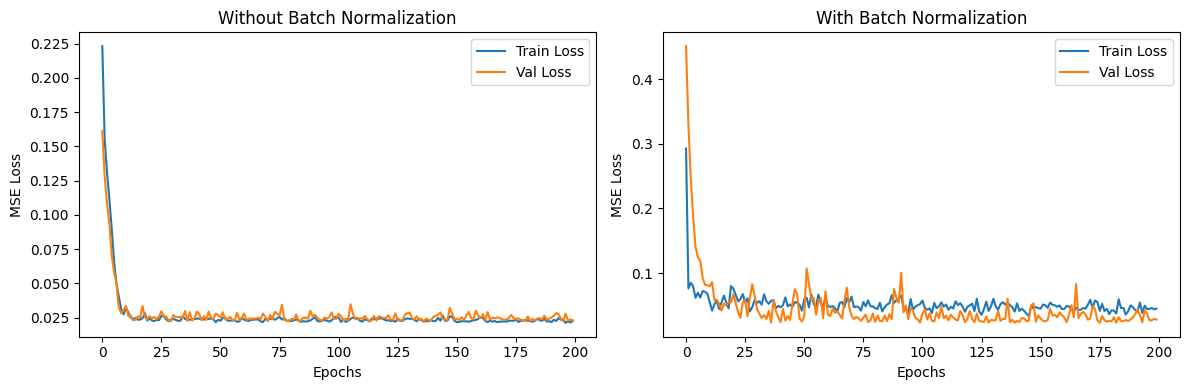

In [ ]:
# -----------------------------
# 4. Plot Training Curves
# -----------------------------
plt.figure(figsize=(12, 4))
for i, (name, history) in enumerate(histories.items()):
    plt.subplot(1, 2, i + 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


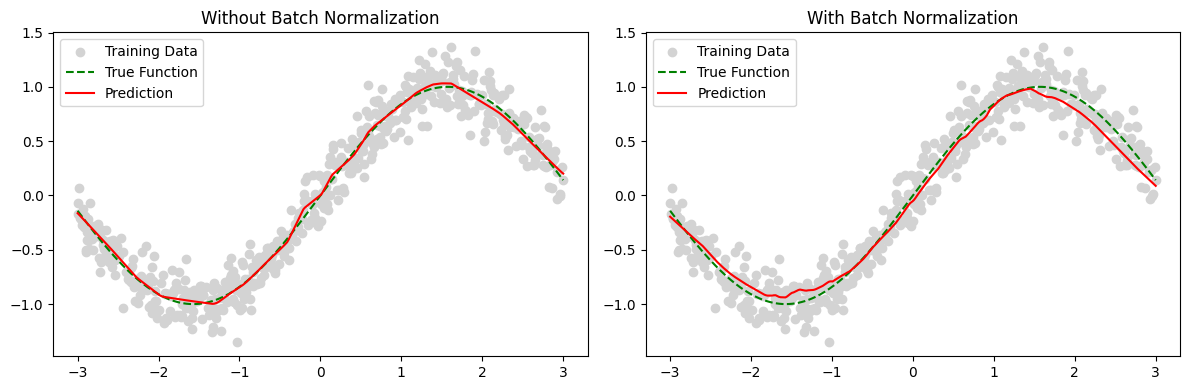

In [ ]:
# -----------------------------
# 5. Visualize Predictions
# -----------------------------
x_line = np.linspace(-3, 3, 300).reshape(-1, 1)

plt.figure(figsize=(12, 4))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train, y_train, color='lightgray', label='Training Data')
    plt.plot(x_line, np.sin(x_line), 'g--', label='True Function')
    plt.plot(x_line, model.predict(x_line), 'r', label='Prediction')
    plt.title(name)
    plt.legend()
plt.tight_layout()
plt.show()